<a href="https://colab.research.google.com/github/kcarnold/cs344/blob/main/src/A_Batch_of_Practice_(blank).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
!pip install -Uq fastbook

# Preamble

In [81]:
from fastai.vision.all import *

In [82]:
# Make one-channel images display in greyscale.
# See https://forums.fast.ai/t/show-image-displays-color-image-for-mnist-sample-dataset/78932/4
matplotlib.rc('image', cmap='Greys')

In [83]:
path = untar_data(URLs.PETS) / "images"
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [84]:
image_files = get_image_files(path)
image_files

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_71.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_88.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_112.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_66.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_114.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_102.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_132.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_111.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_259.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_69.jpg')...]

Make a stable order for the images: first sort, then randomize using a known seed.

In [85]:
image_files.sort()
set_seed(333)
random.shuffle(image_files)

Define how we're going to split the data into a training and validation set.

In [86]:
splitter = RandomSplitter(valid_pct=0.2, seed=42)

In this dataset, cat breeds start with a capital letter, so we can get the label from the filename.

In [87]:
def cat_or_dog(x):
    return 'cat' if x[0].isupper() else 'dog'

Here's a nice cat.

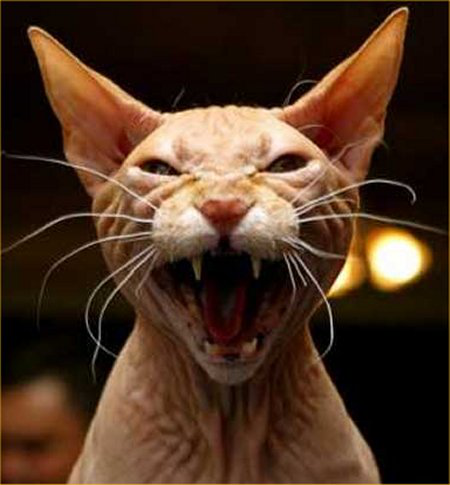

In [88]:
filename = path / "Sphynx_250.jpg"
img = PILImage.create(filename); img

In [89]:
def get_y(file_path):
    return cat_or_dog(file_path.name)
get_y(filename)

'cat'

In [90]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_y     = get_y,
                   splitter  = splitter,
                   item_tfms = Resize(224))

In [91]:
# override shuffle_fn so that the images never actually get shuffled (batch order is consistent)
dataloaders = dblock.dataloaders(image_files, batch_size=9, shuffle_fn=lambda idxs: idxs)

In [92]:
dataloaders.train.n

5912

# What does a batch of images look like?

Since we set the `shuffle_fn` to the identity above, the images will always get loaded in the same order, so the first batch will always be the same:

In [93]:
batch = dataloaders.train.one_batch()
images, labels = batch

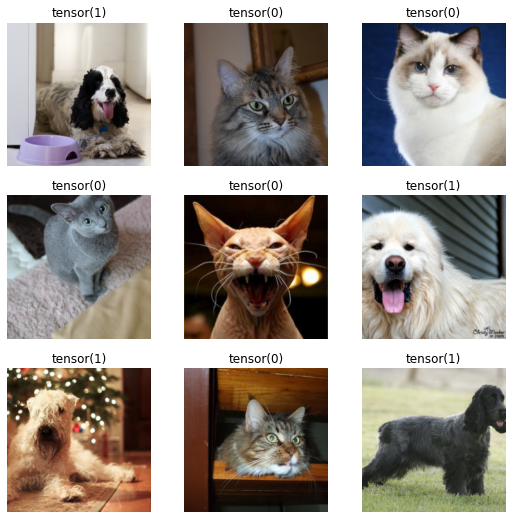

In [94]:
show_image_batch((images, labels))

In [95]:
images.shape

(9, 3, 224, 224)

**What does that shape mean?**

In [96]:
labels

TensorCategory([1, 0, 0, 0, 0, 1, 1, 0, 1])

**What do those numbers mean?**

In [97]:
vocab = dataloaders.train.vocab
vocab[0], vocab[1]

('cat', 'dog')

**Exercise: show the first image in the batch.**

**Exercise: show the average image (mean along dimension ___)**.

**Exercise: make the images grayscale**.

**Exercise: invert the color of the images** (e.g., black becomes white)

**Exercise: show only the red color channel**

**Exercise:: show a 64-pixel-square cutout of the image, starting at 64 pixels in from the top and left.**

**Exercise: show the result of applying `Rotate` on the images.** Set `max_deg` to 45 and `p` to 1.0.

# Data Augmentation

In [103]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_y     = lambda filename: cat_or_dog(filename.name),
                   splitter  = splitter,
                   item_tfms = RandomResizedCrop(128),
                   batch_tfms= aug_transforms())
dblock.summary(image_files)
dataloaders_aug = dblock.dataloaders(image_files, batch_size=9, shuffle_fn=lambda idxs: idxs)

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_177.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x500
  Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_177.jpg
    applying <lambda> gives
      dog
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=500x500, TensorCategory(1))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}


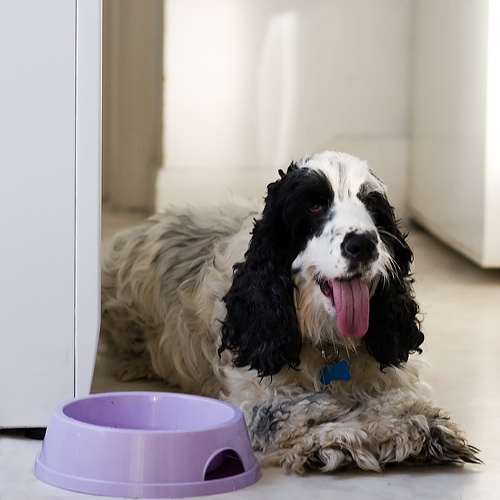

In [104]:
dataloaders_aug.train.dataset[0][0]

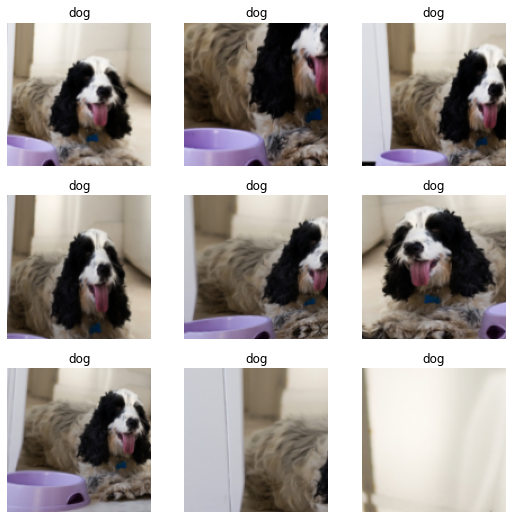

In [105]:
dataloaders_aug.train.show_batch(unique=True)